# 1. Import library dan data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [15]:
titanic3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_titanic3.csv')

FileNotFoundError: ignored

In [ ]:
#EDA/ Visualisasi, preprossesing

In [ ]:
print("data titanic: ", titanic3.shape)

In [ ]:
titanic3.info()

VARIABLE DESCRIPTIONS:
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [3]:
titanic3.head(10)

NameError: ignored

# 2. Basic summary statistic

In [ ]:
titanic3.describe()  #Deskriptif analitik

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
display(titanic3.describe(include=np.number).transpose())
display(titanic3.describe(include=np.object).transpose())

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.00,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.00,72.0000,155.0000,256.000,328.0000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,count,unique,top,freq
name,1309,1307,"Connolly, Miss. Kate",2
sex,1309,2,male,843
ticket,1309,929,CA. 2343,11
cabin,295,186,C23 C25 C27,6
embarked,1307,3,S,914
boat,486,27,13,39
home.dest,745,369,"New York, NY",64


In [ ]:
def countplot(column):
    return sns.countplot(x= column, data= titanic3)

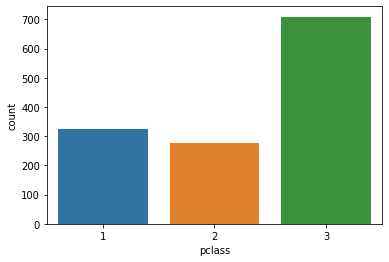

In [ ]:
countplot('pclass')

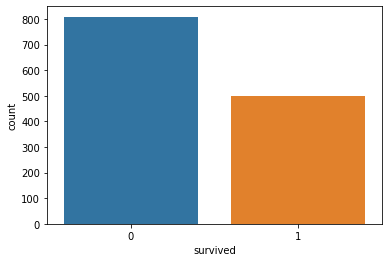

In [ ]:
countplot('survived')

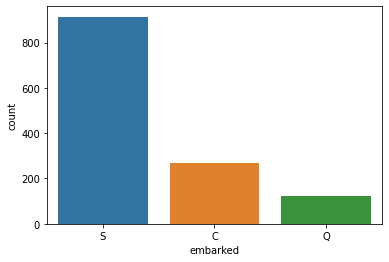

In [ ]:
countplot('embarked')

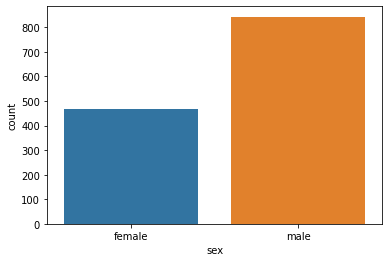

In [ ]:
countplot('sex')

In [ ]:
titanic3.plot.scatter(x="fare", y='survived', figsize=(6,4))

In [ ]:
titanic3.corr(method='pearson') #korelasi antar kelas

In [ ]:
corr=titanic3.corr()#["survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

# mencari korelasi antar fitur 

In [ ]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [ ]:
compute_freq_chi2(titanic3.survived,titanic3.pclass)

In [ ]:
compute_freq_chi2(titanic3.survived,titanic3.embarked)

In [ ]:
compute_freq_chi2(titanic3.survived,titanic3.sex)

In [ ]:
sns.boxplot(x="embarked", y="fare", hue="survived", data=titanic3);

In [ ]:
data = titanic3.drop(['survived'],axis=1)
data.boxplot(figsize=(20,3))

In [ ]:
col = ["survived", "pclass", "embarked", "fare", "age", "sibsp"]
sns.pairplot(titanic3[col], kind='scatter', diag_kind='kde')
plt.show()

# 3. Data Preprocessing

In [ ]:
#Cek duplikasi data

titanic3.duplicated(keep=False).sum()

0

In [ ]:
#Cek missing value

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(titanic3)

           Total   Percent
body        1188  0.907563
cabin       1014  0.774637
boat         823  0.628724
home.dest    564  0.430863
age          263  0.200917
embarked       2  0.001528
fare           1  0.000764


In [ ]:
#Counting the number of cabins
titanic3['cabin'].str.split(" ", expand=True).count().rename(lambda x: x+1)

1    295
2     41
3     15
4      5
dtype: int64

In [ ]:
#Cek jumlah yang survived dan tidak pada setiap kelompok Cabin

(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN


In [ ]:
#Cek rata2 fare pada yg survived dan tidak pada setiap kelompok Cabin

(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN


In [ ]:
# imputasi missing value (NaN) pada atribut Cabin dengan U (Unknown)
titanic3['cabin'] = titanic3['cabin'].fillna('U')

In [ ]:
#Cek jumlah yang survived dan tidak pada setiap kelompok Cabin setelah proses imputasi

(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN
U,707.0,307.0


In [ ]:
#Cek rata2 fare pada yg survived dan tidak pada setiap kelompok Cabin

(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN
U,16.529378,25.119516


In [ ]:
#drop atirbut yang tidak penting

titanic3_cleaned = titanic3.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [ ]:
cek_null(titanic3_cleaned)

          Total   Percent
boat        823  0.628724
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [ ]:
titanic3_cleaned['boat'] = titanic3_cleaned['boat'].fillna('None')

In [ ]:
#check jumlah yg survived dan tidak jika mempunyai boat atau tidak
(titanic3_cleaned
 .groupby([titanic3_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,5.0
10,NaN,29.0
11,NaN,25.0
12,1.0,18.0
13,NaN,39.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,1.0,32.0
15,NaN,37.0


In [ ]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [ ]:
cek_null(titanic3_cleaned)

          Total   Percent
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [ ]:
col = ["age"]
for c in col:
    median = titanic3_cleaned[~titanic3_cleaned.isna()].median()[0]
    titanic3_cleaned[c] = titanic3_cleaned[c].fillna(median)

In [ ]:
cek_null(titanic3_cleaned)

          Total   Percent
embarked      2  0.001528
fare          1  0.000764


In [ ]:
titanic3_cleaned["embarked"] = titanic3_cleaned["embarked"].fillna('C')

In [ ]:
titanic3_cleaned[titanic3_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [ ]:
#drop data atau baris yg ada missing value pada atributnya

titanic3_cleaned.dropna(inplace=True)

In [ ]:
#jumlah baris berubah dari 1309 menjadi 1308 dan jumlah fitur dari 14 menjadi 9

titanic3_cleaned.shape

(1308, 9)

In [ ]:
#remove data outlier pada fitur fare data dengan fare > 500
idx = titanic3_cleaned[titanic3_cleaned["fare"] > 500].index
titanic3_cleaned = titanic3_cleaned.drop(idx, axis=0)

In [ ]:
#jumlah baris berubah dari 1308 menjadi 1304 karena hasil remove outlier 

titanic3_cleaned.shape

(1304, 9)

In [ ]:
#dataset setelah preprocessing

titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [ ]:
titanic3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1304 non-null   int64  
 1   survived  1304 non-null   int64  
 2   sex       1304 non-null   object 
 3   age       1304 non-null   float64
 4   sibsp     1304 non-null   int64  
 5   parch     1304 non-null   int64  
 6   fare      1304 non-null   float64
 7   embarked  1304 non-null   object 
 8   boat      1304 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [ ]:
#melakukan label encoding data kategorikal yang masih string ke numeric value

col = titanic3_cleaned.select_dtypes(include=["object"]).columns

for c in col:
    if len(titanic3_cleaned[c].value_counts()) <= 28:
        le = LabelEncoder() 
        le.fit(list(titanic3_cleaned[c].values)) 
        titanic3_cleaned[c] = le.transform(list(titanic3_cleaned[c].values))

In [ ]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,0,29.00,0,0,211.3375,2,11
1,1,1,1,0.92,1,2,151.5500,2,2
2,1,0,0,2.00,1,2,151.5500,2,27
3,1,0,1,30.00,1,2,151.5500,2,27
4,1,0,0,25.00,1,2,151.5500,2,27


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1304 non-null   int64  
 1   sex       1304 non-null   int64  
 2   age       1304 non-null   float64
 3   sibsp     1304 non-null   int64  
 4   parch     1304 non-null   int64  
 5   fare      1304 non-null   float64
 6   embarked  1304 non-null   int64  
 7   boat      1304 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 91.7 KB


In [ ]:
#memisahkan kolom label kelas dengan kolom atribut

X = titanic3_cleaned.drop('survived', axis=1)
Y = titanic3_cleaned['survived']

In [ ]:
X.shape

(1304, 8)

In [ ]:
Y.shape

(1304,)

In [ ]:
#Normalisasi

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

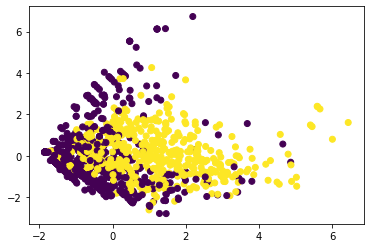

In [ ]:
#reduksi dimensi menggunakan PCA

from sklearn.decomposition import PCA as sklearnPCA

pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', c=Y)
plt.show()

In [ ]:
#terjadi transformasi data jika menggunakan PCA

X_pca[:3]

array([[ 3.699484  , -0.65855485],
       [ 2.82784793,  1.38055468],
       [ 2.53324818,  1.59824919]])

In [ ]:
#feature selection (rank) filter-based 
#data tdk berubah hanya berkurang jumlah fitur menjadi 2 fitur

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X_selector = SelectKBest(mutual_info_classif, k=2).fit_transform(X, Y)

In [ ]:
X_selector[:3]

array([[ 0., 11.],
       [ 1.,  2.],
       [ 0., 27.]])

In [ ]:
#klasifikasi menggunakan Decision Tree pada data sebelum direduksi dimensi ada 8 fitur

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=0)
clf_DT = tree.DecisionTreeClassifier(max_depth=2)
clf_DT = clf_DT.fit(X_train, Y_train)

hasil_testing_DT = clf_DT.predict(X_test)
accuracy_DT = accuracy_score(Y_test, hasil_testing_DT)
print('Accuracy:',accuracy_DT)

Accuracy: 0.9693486590038314


In [ ]:
#klasifikasi menggunakan Decision Tree pada data setelah direduksi dimensi PCA 2 fitur

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=.2, stratify=Y, random_state=0)
clf_DT = tree.DecisionTreeClassifier(max_depth=2)
clf_DT = clf_DT.fit(X_train, Y_train)

hasil_testing_DT = clf_DT.predict(X_test)
accuracy_DT = accuracy_score(Y_test, hasil_testing_DT)
print('Accuracy:',accuracy_DT)

Accuracy: 0.8084291187739464


In [ ]:
#klasifikasi menggunakan Decision Tree pada data setelah di seleksi fitur menjadi 2 fitur

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_selector, Y, test_size=.2, stratify=Y, random_state=0)
clf_DT = tree.DecisionTreeClassifier(max_depth=3)
clf_DT = clf_DT.fit(X_train, Y_train)

hasil_testing_DT = clf_DT.predict(X_test)
accuracy_DT = accuracy_score(Y_test, hasil_testing_DT)
print('Accuracy:',accuracy_DT)

Accuracy: 0.9693486590038314
